In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode
from scipy.stats import bootstrap

In [2]:
public_key = 'https://disk.yandex.ru/d/j9Sx2ResbatMYg'

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [5]:
df = pd.read_csv(download_url)

In [6]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [7]:
df.groupby('group').agg({'value': 'count'})

,value
group,
control,760
experimental,494


<Axes: xlabel='value', ylabel='Count'>

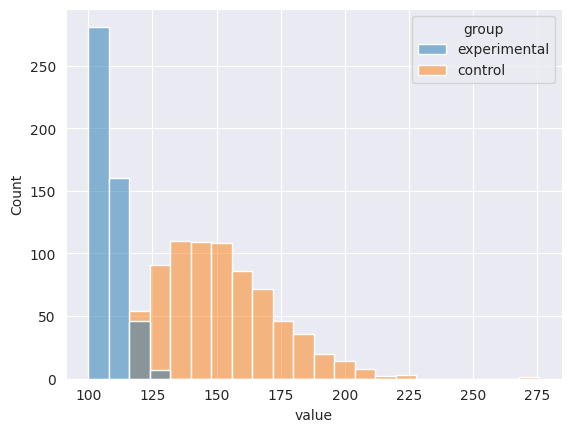

In [9]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='value', hue='group')

In [10]:
df.groupby('group').agg({'value': np.median})

,value
group,
control,148.832127
experimental,106.982597


In [12]:
control_df = df[df['group'] == 'control']

<Axes: xlabel='value', ylabel='Count'>

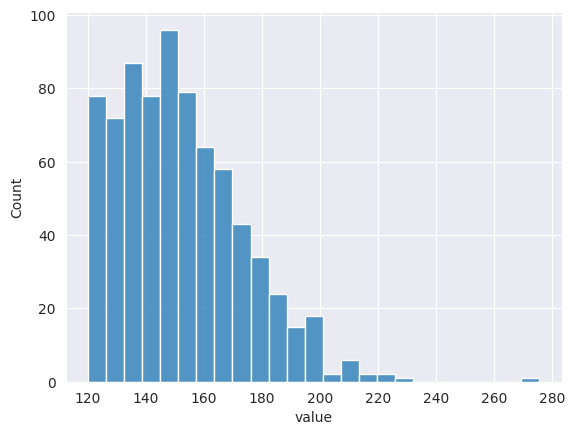

In [13]:
sns.histplot(data=control_df, x='value')

In [15]:
control_df['value'].median()

148.83212650911054

In [17]:
control_df.sample(frac=1, replace=True)

,value,group
778,156.035559,control
718,131.738522,control
974,171.342161,control
787,197.521914,control
1214,161.528693,control
...,...,...
662,162.034911,control
557,173.406915,control
1251,129.780424,control
867,133.637118,control


In [20]:
df_test = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8]})

In [21]:
df_test.sample(frac=1, replace=True)

,x
7,8
7,8
5,6
4,5
4,5
6,7
6,7
3,4


In [22]:
sample_df = control_df.sample(frac=1, replace=True)

<Axes: xlabel='value', ylabel='Count'>

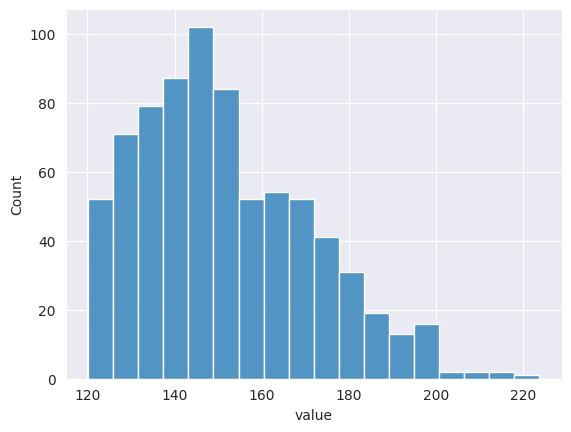

In [23]:
sns.histplot(data=sample_df, x='value')

In [31]:
n = 10000
result = [control_df.sample(frac=1, replace=True)['value'].median() for _ in range(n)]

In [32]:
result[:10]

[148.83212650911054,
 148.22070828853512,
 150.87816452347263,
 146.69297196606684,
 148.54316567331168,
 148.62455967658255,
 149.67508262192186,
 150.74580151060346,
 150.2162325738994,
 147.94781890169762]

<Axes: ylabel='Count'>

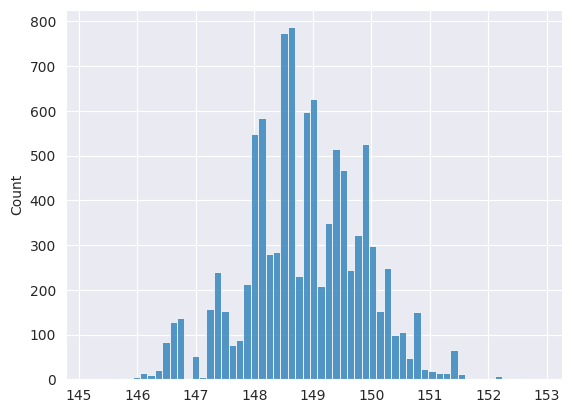

In [33]:
sns.histplot(data=result)

In [34]:
pd.Series(result).describe()

count    10000.000000
mean       148.859474
std          0.992559
min        145.158779
25%        148.192114
50%        148.826750
75%        149.565183
max        152.870699
dtype: float64

In [42]:
bootstrap((control_df['value'], ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.66616569213227, high=150.7763799798184), bootstrap_distribution=array([148.34527567, 150.24186111, 149.026422  , ..., 148.8277415 ,
       149.27412444, 148.19211362]), standard_error=0.9917094508787827)

In [38]:
exp_df = df[df['group'] == 'experimental']

In [44]:
bootstrap((exp_df['value'], ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=106.23468189808288, high=107.79741396723091), bootstrap_distribution=array([107.56068726, 107.00873999, 107.3257002 , ..., 107.42263013,
       105.72710376, 107.49834186]), standard_error=0.41223618655213184)

In [47]:
n = 10000
median_dif = [(control_df.sample(frac=1, replace=True)['value'].median() \
               - exp_df.sample(frac=1, replace=True)['value'].median()) \
              for _ in range(n)]

In [49]:
pd.Series(median_dif).describe()

count    10000.000000
mean        41.914476
std          1.062458
min         38.215556
25%         41.218618
50%         41.909826
75%         42.644998
max         46.231587
dtype: float64